C:\Users\molin\AppData\Local\Temp\ipykernel_25228\2003792389.py:13: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(x_list,y_list,z_list,kind="linear")
C:\Users\molin\AppData\Local\Temp\ipykernel_25228\2003792389.py:17: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for


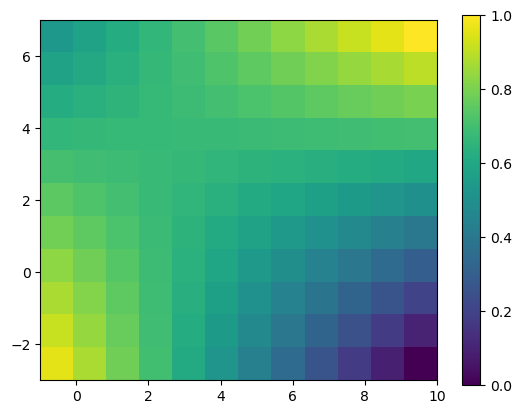

In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import numpy as np


x_list = [-1,2,10,3]
y_list = [3,-3,4,7]
z_list = [5,1,2.5,4.5]
# f will be a function with two arguments (x and y coordinates),
# but those can be array_like structures too, in which case the
# result will be a matrix representing the values in the grid 
# specified by those arguments
f = interp2d(x_list,y_list,z_list,kind="linear")

x_coords = np.arange(min(x_list),max(x_list)+1)
y_coords = np.arange(min(y_list),max(y_list)+1)
Z = f(x_coords,y_coords)

fig = plt.imshow(Z,
           extent=[min(x_list),max(x_list),min(y_list),max(y_list)],
           origin="lower")

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
plt.scatter(x_list,y_list,400,facecolors='none')
plt.colorbar()
plt.show()

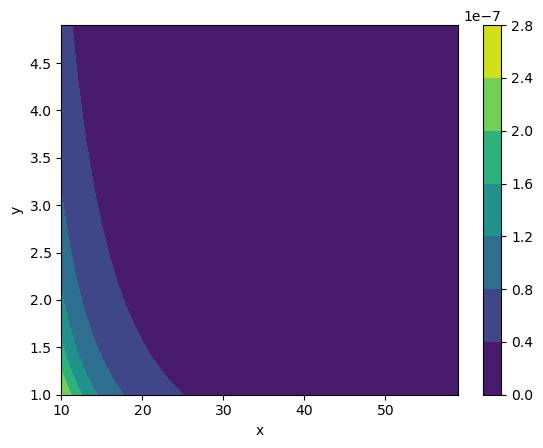

In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

X=[]
Y=[]
z=[]
#dados geradores
for i in np.arange(10,60,1):
    X.append(i)
for j in np.arange(1,5,0.1):
    p=j*(10**(-12))
    Y.append(j)
wt=(2*np.pi)*6.8*(10**9) #Hz
R=50 #ohms
#x=Zlambda/4

#y=Cp

#y2=Zlambda/2

#k0=R/(x^2*y)
#lamb=k0/(sqrt(12))
#G0=1-(((((3.14159*R)/(wt*x))*(((x*(1-(x/R)^2)))+(2*y2*(1-((x^4)/((y2^2)*(R^2)))))))-((6*(x^2)*y)/(R)))^(-4))*(lamb^6)
#BW=(R/((x^2)*y))*(((1/G0)^(1/4)))
y2=60
x, y = np.meshgrid(X, Y)
k0=R/((x**2)*y)
lamb=k0/(np.sqrt(12))
alpha=((np.pi)/(2*wt))*((x*(1-((x**2)/(R**2))))+((2*y2)*(1-((x**4)/((R**2)*(y2**2))))))
BW=(k0/2)*((1+(((alpha-(((x**2)*k0*R)/(2*(lamb**2))))**(-4))/(k0*(lamb**10))))**(-0.25))
BW_MHz=BW*(10**(-6))
#print(len(x),len(y),z)


#gráfico
plt.contourf(x, y, BW_MHz)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


42725660088.82119
wd= 1.256637e+09
k0= 1.851852e+10
beta 0.000000e+00
lamb= 5.345836e+09
G0= 1.000000e+00
Gmax= 1.333333e+00


TypeError: Input z must be 2D, not 0D

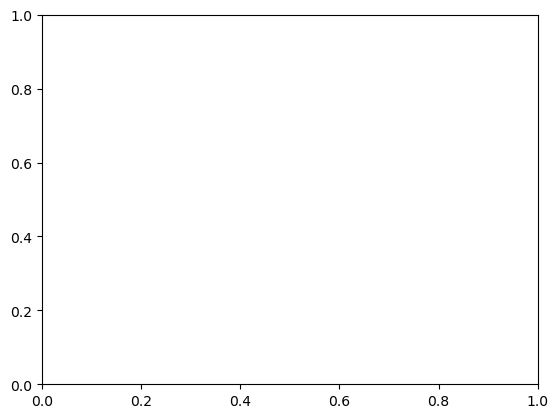

In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

#x=Cp
#y=Zlamb/4
#y2=Zlamb/2
#R=chain impedance
#Ic=corrente crítica JJ
#wt=freq do CPW de modelo
#wp=freq detuning
#phi0= quantum flux
#omega_p=transmon freq


#dados geradores
#X = np.linspace(30, 45, 1000)
#Y = np.linspace((1* 10**(-12)),(5* 10**(-12)),1000) 
#x, y = np.meshgrid(X, Y)
#y = np.flip(y)
x=30
y=3 * 10**(-12)

wt=2 * (np.pi) * (6.8 * 10**(9)) #Hz
R=50 #ohms
y2=60 #Ohms
wp=2 * wt
print(wt)
#Ic=3.6*(10**(-6))
#phi0=2.06783*(10**(-15))
#Lp=phi0 / (4 * (np.pi) * Ic)
omegap = 2 * (np.pi) * (7 * 10**(9))
#print(omega_p, wp)

k0=R/((x**2)*y) #1.5e10
wd=omegap-(wp/2) #
print('wd=', '{:e}'.format(wd))
#beta=2 * wd / ((np.sqrt(3)) * k0)
beta=0
lamb=(k0/(np.sqrt(12)))*(np.sqrt(1+(3*(beta**2))))
al=(np.pi)/(2*wt) * (x * (1-((x**2)/(R**2))) + 2*y2*(1-((x**4)/((R**2)*(y2**2)))))
a=(lamb**2 - wd**2)
b=(x**2 * k0 * R)/(2*a)
#print(k0, lamb, wd)
G0=1 + (((a*(al-b))**(-4)) * k0**2 * lamb**2)
BW=(k0 / 2) * (G0**(-0.25))
#BW_300
Gmax=1+((3 * (1 + (7 * beta**2))-(4 * beta * ((1 + 3 * beta**2)**0.5)))**(-1))
print('k0=', '{:e}'.format(k0))
print('beta', '{:e}'.format(beta))
print('lamb=', '{:e}'.format(lamb))
print('G0=', '{:e}'.format(G0))
print('Gmax=', '{:e}'.format(Gmax))
plt.contourf(x, y, BW,cmap='jet')
plt.colorbar()
plt.ylabel('Cp pF')
plt.xlabel('Zlambda/4 Ohms')
plt.show()

BW_MHz=BW * 10**(-6)

BWteste = BW
BWteste[G0 < 18] = 0
#BWteste[BW<300]=0

#gráfico
plt.contourf(x, y, BWteste,cmap='jet')
plt.colorbar()
plt.ylabel('Cp pF')
plt.xlabel('Zlambda/4 Ohms')
plt.show()

#3d
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.plot_surface(x, y, BW_MHz, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')


In [ ]:
plt.contourf(x, y, BWteste,cmap='jet')
plt.colorbar()
plt.ylabel('Cp pF')
plt.xlabel('Zlambda/4 Ohms')
plt.show()

In [ ]:
plt.imshow(BW_MHz, cmap = 'jet')

In [23]:
#X = np.linspace(-50,50,1000)
#Y = np.linspace(-50,50,1000)
#x, y = np.meshgrid(X, Y)
#f = np.sqrt(x**2 + y**2)
#g = np.sqrt(x**2 + y**2)
BWteste = BW_MHz
BWteste[G0 < 18] = 0
BWteste[(BW * 10**(-6))<300]=0

(<matplotlib.image.AxesImage at 0x2291027c310>,
 <matplotlib.colorbar.Colorbar at 0x2290f11dca0>)

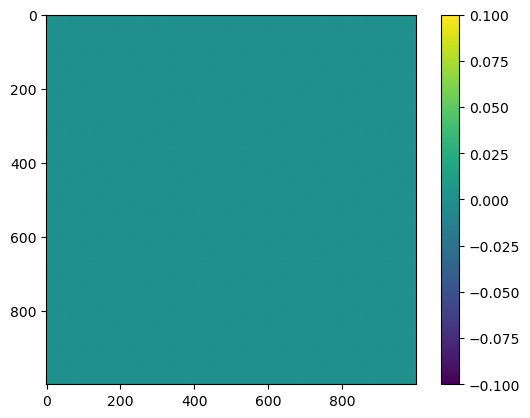

In [24]:
plt.imshow(BWteste), plt.colorbar()

In [27]:
X=[0,1,2,3]
Y=[0,5,10,20,30]
z = np.meshgrid(X,Y)
print(z)

[array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]]), array([[ 0,  0,  0,  0],
       [ 5,  5,  5,  5],
       [10, 10, 10, 10],
       [20, 20, 20, 20],
       [30, 30, 30, 30]])]


In [73]:
np.pi

3.141592653589793

42725660088.82119
wd= 0.000000e+00
1.0


TypeError: Input z must be 2D, not 0D

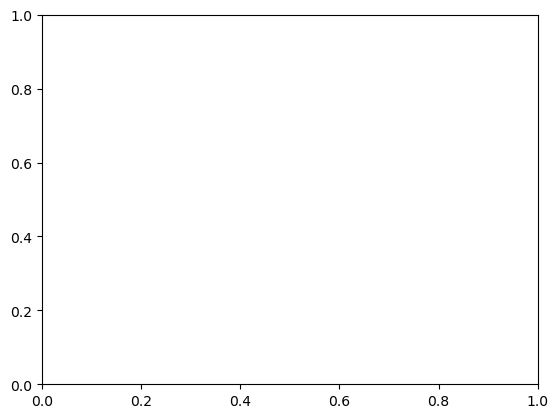

In [130]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

#x=Cp
#y=Zlamb/4
#y2=Zlamb/2
#R=chain impedance
#Ic=corrente crítica JJ
#wt=freq do CPW de modelo
#wp=freq detuning
#phi0= quantum flux
#omega_p=transmon freq

#MUDEI O ALFA USANDO ALFA=2Zaux/Omega_aux

#dados geradores
#X = np.linspace(30, 45, 1000)
#Y = np.linspace((1* 10**(-12)),(5* 10**(-12)),1000) 
#x, y = np.meshgrid(X, Y)
#y = np.flip(y)
x=40
y=3.4 * 10**(-12)

wt=2 * (np.pi) * (6.8 * 10**(9)) #Hz
R=50 #ohms
y2=58 #Ohms
wp=2 * wt
print(wt)
#Ic=3.6*(10**(-6))
#phi0=2.06783*(10**(-15))
#Lp=phi0 / (4 * (np.pi) * Ic)
omegap = 2 * (np.pi) * (6.8 * 10**(9))
#print(omega_p, wp)

k0=R/((x**2)*y) #1.5e10
wd=omegap-(wp/2) #
print('wd=', '{:e}'.format(wd))
beta=2 * wd / ((np.sqrt(3)) * k0)
lamb=(k0/(np.sqrt(12)))*(np.sqrt(1+(3*(beta**2))))
al=(np.pi)/(4*wt) * (x * (1-((x**2)/(R**2))) + 2*y2*(1-((x**4)/((R**2)*(y2**2)))))
#print('alpha_opt=', '{:e}'.format(al))
a=(lamb**2 - wd**2)
b=(x**2 * k0 * R)/(2*a)
#print(k0, lamb, wd)
G0=1 + (((a*(al-b))**(-4)) * k0**2 * lamb**2)
BW=(k0 / 2) * (G0**(-0.25))
w=0.01
ganho=G0/(1+(w/BW)**4)
print(ganho)
#BW_300
#print('k0=', '{:e}'.format(k0))
#print('beta', '{:e}'.format(beta))
#print('lamb=', '{:e}'.format(lamb))
#print('G0=', '{:e}'.format(G0))
plt.contourf(x, y, BW,cmap='jet')
plt.colorbar()
plt.ylabel('Cp pF')
plt.xlabel('Zlambda/4 Ohms')
plt.show()

BW_MHz=BW * 10**(-6)

BWteste = BW
BWteste[ganho < 15] = 0
BWteste[BW<300]=0

#gráfico
plt.contourf(x, y, BWteste,cmap='jet')
plt.colorbar()
plt.ylabel('Cp pF')
plt.xlabel('Zlambda/4 Ohms')
plt.show()

#3d
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.plot_surface(x, y, BW_MHz, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')
